In [8]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
# defining data path
data_path=Path('../0.resources/cancer_patient_data_sets.csv')
# Reading data source using pandas
cancer_df=pd.read_csv(data_path)

In [10]:
# looking for dataframe
cancer_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [11]:
#cancer_df=cancer_df[['Coughing of Blood','Obesity','Smoking','Fatigue','Alcohol use','Balanced Diet','Air Pollution', 'Level']]

In [12]:
cancer_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [13]:
#cancer_df.to_html('cancer.html')

In [14]:
# shape of dataframe
cancer_df.shape

(1000, 25)

In [15]:
#data types of dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [16]:
#looking for target columns
cancer_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [17]:
#cancer_df['Level']=cancer_df['Level'].replace('Medium', 'Low')

In [18]:
#looking for target columns
cancer_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [21]:
#dropping unnecessary columns
cancer_df.drop(columns=['Patient Id'], inplace=True)

In [22]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=cancer_df.drop('Level', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=cancer_df['Level'].values 

In [23]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [25]:
# Scaling the X data by using StandardScaler()
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
X_train_scaled=X_train

In [26]:
# Transforming the test dataset based on the fit from the training dataset
#X_test_scaled = scaler.transform(X_test)
X_test_scaled=X_test

## Model score function using train data only

In [27]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled,
                X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("****************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("**********Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("************Confusion Matrix using cross_val_predict******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    



## Model score function using both train and test data 

In [28]:
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("****************Train Score******************")
    print(train_score)
    print()

    print("*****************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    

    


## Stochastic Gradent Descent Classifier

In [29]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

In [30]:
#score for logistic regression using only training data
train_score(sgd)

****************Train Score******************
0.9786666666666667

**********Using K=3 cross validation**********
[0.84  0.948 0.956]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  3 196  38]
 [ 15   8 229]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       261
           1       0.96      0.83      0.89       237
           2       0.86      0.91      0.88       252

    accuracy                           0.91       750
   macro avg       0.92      0.91      0.91       750
weighted avg       0.92      0.91      0.91       750




## KNeighbors Classifier

In [31]:
# Creating a Kneighbors classifier model on the scaled data
knn= KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
#score for Kneighbors classifier using only training data
train_score(knn)

****************Train Score******************
0.9986666666666667

**********Using K=3 cross validation**********
[0.996 0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   7   0]
 [  0 236   1]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       0.97      1.00      0.98       237
           2       1.00      1.00      1.00       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 0.999/0.996
k: 5, Train/Test Score: 0.999/0.996
k: 7, Train/Test Score: 0.999/0.996
k: 9, Train/Test Score: 0.999/0.996


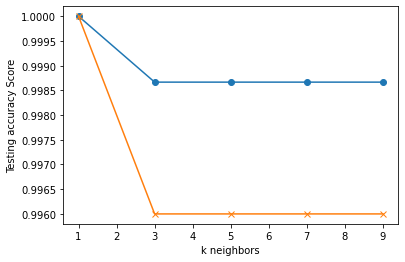

In [33]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    tra_score = knn.score(X_train_scaled, y_train)
    tes_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tra_score)
    test_scores.append(tes_score)
    print(f"k: {k}, Train/Test Score: {tra_score:.3f}/{tes_score:.3f}")
    
#plotting knn scores
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# Creating a Kneighbors classifier model on the scaled data
knn_5= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [35]:
#score for Kneighbors classifier using training and test data
train_score(knn_5)

****************Train Score******************
0.9986666666666667

**********Using K=3 cross validation**********
[0.996 0.952 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   7   0]
 [  0 236   1]
 [  5   0 247]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       261
           1       0.97      1.00      0.98       237
           2       1.00      0.98      0.99       252

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750




### Tuning hyperparamaters  using Grid Search CV for knn

In [36]:
#### Using GridSearchCV
param_grid_knn = {'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree'],
             'n_neighbors':[1,5,8,10]}
grid_knn = GridSearchCV(knn_5, param_grid_knn, verbose=4, n_jobs=-1)

In [37]:
grid_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [38]:
# List the best parameters for this dataset
print(grid_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [39]:
# List the best score
print(grid_knn.best_score_)

0.9986666666666666


In [40]:
#best estimator
knn_b=grid_knn.best_estimator_
knn_b

KNeighborsClassifier(n_neighbors=1)

In [41]:
#score for logistic regression using training and test data
train_score(knn_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[0.996 1.    1.   ]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 236   1]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Support Vector Classifier

In [42]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [43]:
#score for support vector classifier using only training data
train_score(svc)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




### Tuning hyperparamaters  using Randomized Search CV for SVC

In [44]:
#### Using GridSearchCV
param_rand_svc ={
              'C': [1.0,2.0],
                'kernel':['linear', 'poly','rbf'],
                'gamma':['auto','scale']}
rand_svc = RandomizedSearchCV(svc, param_rand_svc, cv=3, verbose=4, n_jobs=-1)

In [45]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=4)

In [46]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

{'kernel': 'poly', 'gamma': 'auto', 'C': 1.0}


In [47]:
# List the best score
print(rand_svc.best_score_)

1.0


In [48]:
#best estimator
svc_R_b=rand_svc.best_estimator_
svc_R_b

SVC(gamma='auto', kernel='poly', probability=True)

In [49]:
#score for logistic regression using training and test data
train_score(svc_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Decision Tree Classifier

In [50]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [51]:
#score for Decision Tree using only training data
train_score(dt)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.18102066 0.10775114 0.37237461
 0.         0.         0.         0.         0.         0.22911083
 0.         0.         0.         0.         0.10974275]


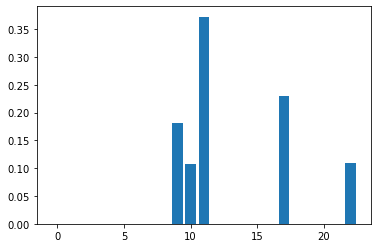

In [52]:
# plotting columns with its importances
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Decision Tree

In [53]:
#### Using GridSearchCV
param_rand_dt ={
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_dt = RandomizedSearchCV(dt, param_rand_dt, cv=3, verbose=4, n_jobs=-1)

In [54]:
rand_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000]},
                   verbose=4)

In [55]:
# List the best parameters for this dataset
print(rand_dt.best_params_)

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}


In [56]:
# List the best score
print(rand_dt.best_score_)

1.0


In [57]:
#best estimator
dt_R_b=rand_dt.best_estimator_
dt_R_b

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [58]:
#score for logistic regression using training and test data
train_score(dt_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [59]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [60]:
#score for Random Forest Classifer using only training data
train_score(rf)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.00781816 0.00062435 0.02822476 0.05544305 0.04313948 0.0268126
 0.04701964 0.01275925 0.04507699 0.1001405  0.03810548 0.12049065
 0.03035055 0.07375581 0.07469227 0.02441095 0.03418013 0.08013334
 0.043072   0.02905675 0.02530831 0.02113339 0.0382516 ]


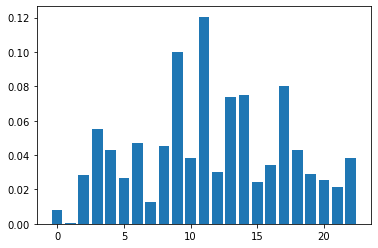

In [61]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [62]:
#### Using GridSearchCV
param_rand_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rf = RandomizedSearchCV(rf, param_rand_rf, cv=3, verbose=1, n_jobs=-1)

In [63]:
rand_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [64]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [65]:
# List the best score
print(rand_rf.best_score_)

0.9906666666666667


In [66]:
#best estimator
rf_R_b=rand_rf.best_estimator_
rf_R_b

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, n_estimators=500)

In [67]:
#score for logistic regression using training and test data
train_score(rf_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




In [68]:
test_score(rf_R_b)

****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0   0]
 [  0  66   0]
 [  0   0  80]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250




## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [69]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

In [70]:
#score for Extremely Random Trees using only training data
train_score(rt)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.00404855 0.00200204 0.04463772 0.06753124 0.04440406 0.02928841
 0.05297534 0.02966228 0.09387001 0.0722288  0.03835197 0.06559102
 0.043734   0.05970051 0.06398759 0.03724567 0.03663208 0.05858371
 0.03501571 0.03935676 0.02640843 0.02113382 0.03361028]


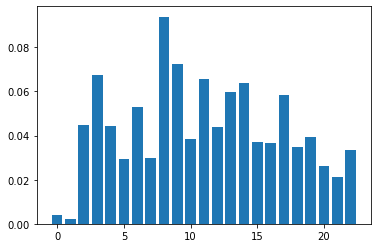

In [71]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [72]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=3, verbose=1, n_jobs=-1)

In [73]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [74]:
# List the best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [75]:
# List the best score
print(rand_rt.best_score_)

0.9866666666666667


In [76]:
#best estimator
rt_R_b=rand_rt.best_estimator_
rt_R_b

ExtraTreesClassifier(criterion='entropy', max_depth=10, max_features='log2',
                     min_samples_leaf=10, n_estimators=500)

In [77]:
#score for logistic regression using training and test data
train_score(rt_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1.    0.972 1.   ]

************Confusion Matrix using cross_val_predict******************
[[254   0   7]
 [  0 234   3]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      0.99      0.99       237
           2       0.96      1.00      0.98       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [78]:
# Creating a AdaBoostClassifier model on the scaled data
ab= AdaBoostClassifier(base_estimator = rf)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [79]:
#score for logistic regression using only training data
train_score(ab)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.0056238  0.000618   0.03332387 0.05694018 0.03853414 0.03714514
 0.03449844 0.01439019 0.05427323 0.10544616 0.03294108 0.09041184
 0.02286866 0.11934607 0.05740323 0.01786415 0.05040146 0.08821303
 0.03834907 0.03366774 0.02230932 0.01120826 0.03422294]


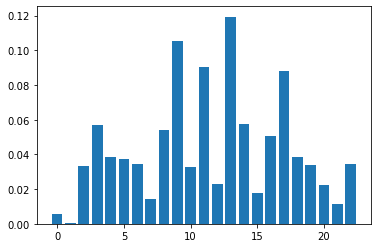

In [80]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for AdaBoostClassifier

In [81]:
#### Using GridSearchCV
param_rand_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.1,0.2,0.5]}
rand_ab = RandomizedSearchCV(ab, param_rand_ab, cv=3, verbose=1, n_jobs=-1)

In [82]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000, 5000]},
                   verbose=1)

In [83]:
# List the best parameters for this dataset
print(rand_ab.best_params_)

{'n_estimators': 100, 'learning_rate': 0.2}


In [84]:
# List the best score
print(rand_ab.best_score_)

1.0


In [85]:
#best estimator
ab_R_b=rand_ab.best_estimator_
ab_R_b

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.2,
                   n_estimators=100)

In [86]:
#score for logistic regression using training and test data
train_score(ab_R_b)

****************Train Score******************
1.0

**********Using K=3 cross validation**********
[1. 1. 1.]

************Confusion Matrix using cross_val_predict******************
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




## Real and predicted value using different model

In [88]:
#Predected value
y_pred_sgd=sgd.predict(X_test_scaled)
y_pred_rf=rf.predict(X_test_scaled)
y_pred_rt=rt.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [92]:
df_pred=pd.DataFrame({'Real value':y_test,
                     'SGD Classifier':y_pred_sgd,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'AdaBoost':y_pred_ab})
df_pred.replace({0:'Low',1:'Medium', 2:'High'}, inplace=True)

[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.993 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.973 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.960 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.993 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbo

In [93]:
df_pred.to_html("cancer_pred.html")

[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.960 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=1.000 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=

SGD Classifier
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


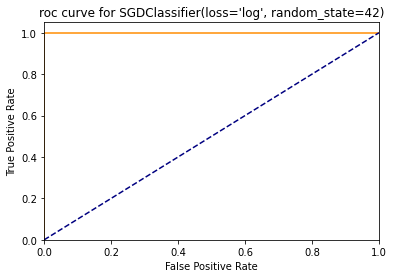


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Logistic Regression
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


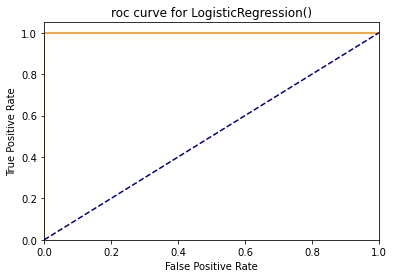


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

SVC
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


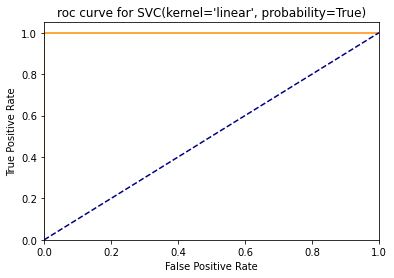


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Decision Tree
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


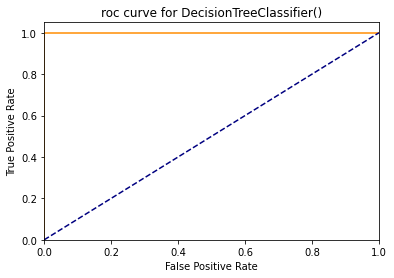


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Random Forest
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


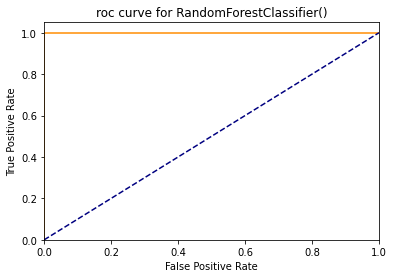


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

Extra Random Tree
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


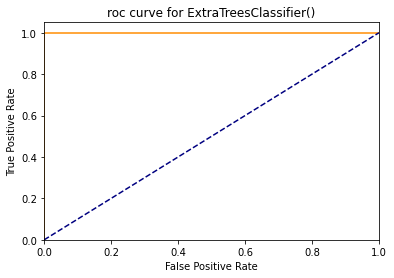


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************

AdaBoost
****************Train Score******************
1.0

*****************Test Score******************
1.0

************Confusion Matrix******************
[[104   0]
 [  0 146]]

********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       146

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


ROC Curve


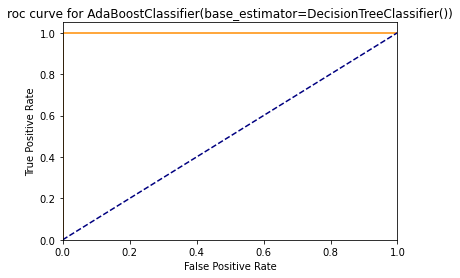


************Area under the curve******************
1.0
None
****************************************************************************************************
****************************************************************************************************



In [97]:
# score for different models using test data
print('SGD Classifier')
print(test_score(sgd))
print("*"*100)
print("*"*100)
print('')

print('Logistic Regression')
print(test_score(lr))
print("*"*100)
print("*"*100)
print('')

print('SVC')
print(test_score(svc))
print("*"*100)
print("*"*100)
print('')

print('Decision Tree')
print(test_score(dt))
print("*"*100)
print("*"*100)
print('')

print('Random Forest')
print(test_score(rf))
print("*"*100)
print("*"*100)
print('')

print('Extra Random Tree')
print(test_score(rt))
print("*"*100)
print("*"*100)
print('')

print('AdaBoost')
print(test_score(ab))
print("*"*100)
print("*"*100)
print('')

In [98]:
#defining function for model scoring with test set
def model_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [99]:
#making dataframe on evaluation metrices
all_evaluation=pd.DataFrame({'SGD':model_score(sgd),
                            'logistic Reg':model_score(lr),
                            'svc':model_score(svc),
                            'Decision Tree':model_score(dt),
                           'Random Forest':model_score(rf),
                            'Extra Random Tree':model_score(rt),
                           'Ada Boost':model_score(ab)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
train score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
test score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
precision_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
all_evaluation.to_html('Resources/Cleaned_data/under_metrics.html')

## Trying to improve score by selecting important features based on Adaboost


In [70]:
#selecting and fitting model
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()))

In [71]:
sel.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False])

In [72]:
#splitting data using train_test split
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [73]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9906666666666667
Testing Score: 0.988


### Logistic Regression after selecting important features

In [74]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.984
Testing Score: 0.968


### SVC after selecting important features

In [75]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear', probability=True).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Decision Tree after selecting important features

In [76]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Random Forest after selecting important features

In [77]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


### Extra Random Tree after selecting important features

In [78]:
#after model selection
rt_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
rt_s_train=rt_s.score(X_selected_train_scaled, y_train)
rt_s_test=rt_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {rt_s_train}')
print(f'Testing Score: {rt_s_test}')

Training Score: 1.0
Testing Score: 1.0


In [79]:
#defining function for model scoring with test set
def model_imp_feat(model, X_train_scaled=X_selected_train_scaled, X_test_scaled=X_selected_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

## Saving the best model

In [133]:
import joblib
joblib.dump(rf, 'model_cancer.pkl')

['model_cancer.pkl']

In [80]:
#making dataframe on evaluation metrices
all_evaluation_imp_feat=pd.DataFrame({'SGD':model_imp_feat(sgd_s),
                            'logistic Reg':model_imp_feat(lr_s),
                            'svc':model_imp_feat(svc_s),
                            'Decision Tree':model_imp_feat(dt_s),
                           'Random Forest':model_imp_feat(rf_s),
                            'Extra Random Tree':model_imp_feat(rt_s)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation_imp_feat

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [96]:
all_evaluation_imp_feat.to_html('Resources/Cleaned_data/under_metrics_imp.html')